# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Mariana Villena
- Akanksha Pandey
- Rappel Ricafort
- Justin Lau
- Amaar Valliani

<a id='research_question'></a>
# Research Question

What are the key success factors for electric vehicle companies in terms of pricing and product features?

Subquestions:

* How has Tesla's success been affected by classical and/or emerging car companies' EV models?
* How have emerging EV companies entered the market and what success have they had?
* When did Classical car companies enter the EV market and how successful were they?

<a id='background'></a>

## Background & Prior Work

A surge in the electric vehicle (EV) interest seems to be greatly influenced by rising gasoline prices and a growing concern for carbon pollution. Consumer demand for EVs have risen increasingly as evident by trends we can observe in the market. The well-known Toyota Prius was a widely popular hybrid electric vehicle that became one of the best-selling vehicles in the industry starting in the early 2000s. The transition toward fully electric vehicles appears to be imminent, as policies and tax incentives are being implemented in favor of EVs. For instance, Tesla Motors became one of the largest auto industry employers, and would start producing the best-selling EV (Model 3) in 2020, which offered a $7500 tax incentive [1]. Despite looming quality control issues regarding Tesla vehicles, its impact far surpassed and outsold other notable flagship EVs such as the Nissan Leaf or Chevy Volt. This research will determine the success of car companies in the EV market, and explore the effects of emerging competition on Tesla’s success. With differences in product features and marketing strategies, the competition between new EV companies and classical car companies delving more into EV production are obscure.

Prior studies have demonstrated previous factors that may have contributed to growth in the electric vehicle market. A study on Tesla valuation concluded that although clean energy transport and production is growing, Tesla’s true market value is determined to be overvalued as of 2021, suggesting that dominant market control and technological innovations are overestimated in worth [2]. The study evaluates the company’s stock price to its earnings (P/E), and acknowledges technological innovations of Tesla - such as the self-driving algorithm - to be “priced-in” to the valuation of Tesla, as well as contributing to its dominating market share. The study utilizes another valuation metric similar to P/E which compares enterprise value to earnings before tax, interest, depreciation, and amortization (EV/EBITDA). Tesla had a much higher ratio when compared to the rest of the market, indicating that Tesla’s profitability is not as high compared to the price of its stock.


References:
1. https://cleantechnica.com/2020/03/10/tesla-passes-1-million-ev-milestone-and-model-3-becomes-all-time-best-seller/ 
2. https://iopscience.iop.org/article/10.1088/1755-1315/692/2/022103/pdf 

# Hypothesis


Regarding some of the trends and successes of EV companies, we believe that Tesla would have gained initial success versus Classical companies with innovative ideas, such as auto-drive, and early-mover advantage into the market but will see recent losses to emerging EV companies who aim to follow Tesla's methods while adding their own improvements. Emerging EV companies will have the most success with higher-end models which are targeted to early adopters and consumers with buying power to test new vehicles. The timing of Classical car companies entering the market will not play a significant role in their later success due to failed models from early adopters, such as Nissan Leaf or Chevy Volt, while these companies are now gaining ground with lower-priced and relatively advanced EVs.

# Dataset(s)

- Dataset Name: **Cheapest Electric Cars 2023**
- Link to the dataset: [Kaggle Link](https://www.kaggle.com/datasets/kkhandekar/cheapest-electric-cars?resource=download)
- Number of observations: 308

The above dataset features 308 EV models, their prices (in Germany), Acceleration, Range, Efficiency, Top Speed, type of drive, number of seats, and Fast Charge Speed. 

- Dataset Name: **Stock Market Analysis of TESLA Inc from 2010 to 2022**
- Link to the dataset: [Kaggle Link](https://www.kaggle.com/datasets/whenamancodes/tesla-inc-stock-market-analysis-founding-years)
- Number of observations: 3077

The above dataset features the stock information of Tesla (the High and Low prices of the day, the opening, adjusted closing, and closing prices, the volume sold in 2010-2022). 

We will be finding the corresponding stock information of the companies listed in the Cheapest Electric Cars dataset and modeling how car features and price correspond to the stock performance of a company. Thus, we will add the company's average stock performance of each car model's year to a combined dataset. 

# Setup

We first need to import the necessary modules we will use in our project.

In [21]:
%matplotlib inline

import numpy as np
import pandas as pd

## seaborn for plotting
import seaborn as sns
sns.set(font_scale=1.2, style="white")

# import matplotlib for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

# improve resolution
%config InlineBackend.figure_format ='retina'

Next, we read in the appropriate CSV files - one for each dataset described above.
- We create the dataframe `cheapEVs` for the first dataset "Cheapest Electric Cars 2023"
- We create the dataframe `teslaStock` for the second dataset "Stock Market Analysis of TESLA Inc from 2010 to 2022"

In [22]:
# Dataset for cheapest electric cars sold in 2023
cheapEVsPath = 'csvData/Cheapestelectriccars-EVDatabase_2023.csv'
cheapEVs = pd.read_csv(cheapEVsPath)
cheapEVs

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
304,Volkswagen ID.7 Pro,77 kWh useable battery Expected from ...,8.0 sec,180 km/h,470 km,164 Wh/km,700 km/h,Rear Wheel Drive,5,"€55,000","£53,000"
305,Volkswagen ID.7 Pro S,86 kWh useable battery Expected from ...,7.0 sec,180 km/h,520 km,165 Wh/km,800 km/h,Rear Wheel Drive,5,"€60,000","£56,000"
306,Polestar 4 Long Range Single Motor,94 kWh useable battery Expected from ...,7.4 sec,180 km/h,510 km,184 Wh/km,760 km/h,Rear Wheel Drive,5,"€60,000","£55,000"
307,Polestar 4 Long Range Dual Motor,94 kWh useable battery Expected from ...,3.8 sec,200 km/h,475 km,198 Wh/km,710 km/h,All Wheel Drive,5,"€65,000","£60,000"


In [23]:
# Dataset for Tesla Stock Market Analysis
teslaStockPath = "csvData/TSLAstock.csv"
teslaStock = pd.read_csv(teslaStockPath)
teslaStock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...,...
3072,2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
3073,2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700
3074,2022-09-15,301.829987,309.119995,300.720001,303.750000,303.750000,64795500
3075,2022-09-16,299.609985,303.709991,295.600006,303.350006,303.350006,86949500


# Data Cleaning

We first downloaded the appropriate CSV files--one for each dataset described above. 
Then, we created the `cheapEVs` dataframe, which we cleaned by turning all string sections of measurements into floats or ints using the `dataToFloat()` function. Next, we standardized the prices to USD and extracted data from the `Subtitle` column.
We then created the `teslaStock` dataframe, which we cleaned by converting the date to datetime format, and creating an average daily stock price column, or `AvgHighLow`. Then, we averaged all the daily stock prices by the years available, stored in `year_avg_tesla_stock`. 

Instructions (**delete later**): Describe your data cleaning steps here.

### Data Cleaning for `cheapEVs` Dataframe

In order to work with the numerical data in the `cheapEVs` dataframe, we must turn all string sections of measurements into floats or ints using the `dataToFloat()` function below.

In [24]:
# will quantify all numeric data into either a float or integer based on the type
def dataToNum(str_in):
    try:
        if(not isinstance(str_in, str)): # in case input is not a string
            return str_in
        
        str_in = str_in.lower()
        str_in = str_in.strip()

        if 'km/h' in str_in: # fast charge speed and top speed
            str_in = str_in.replace('km/h', '')
            output = int(str_in)
        elif 'wh/km' in str_in: # efficiency
            str_in = str_in.replace('wh/km', '')
            output = int(str_in)
        elif 'km' in str_in: # range
            str_in = str_in.replace('km', '')
            output = int(str_in)
        elif 'sec' in str_in: # acceleration
            str_in = str_in.replace(' sec', '')
            output = float(str_in)
        elif '€' in str_in: # price in Germany (euros)
            str_in = str_in.replace('€', '')
            str_in = str_in.replace(',','')
            output = int(str_in)
        elif '£' in str_in: #price in UK (pounds)
            str_in = str_in.replace('£', '')
            str_in = str_in.replace(',','')
            output = int(str_in)
        else: # handles null values
            output = np.nan
    except:
        output = np.nan     
    return output

In [25]:
# use dataToNum() to turn string values in these columns into floats/ints
cheapEVs["TopSpeed"] = cheapEVs["TopSpeed"].apply(dataToNum)
cheapEVs["FastChargeSpeed"] = cheapEVs["FastChargeSpeed"].apply(dataToNum)
cheapEVs['Acceleration'] = cheapEVs['Acceleration'].apply(dataToNum)
cheapEVs['Efficiency'] = cheapEVs['Efficiency'].apply(dataToNum)
cheapEVs['Range'] = cheapEVs['Range'].apply(dataToNum)
cheapEVs['PriceinGermany'] = cheapEVs['PriceinGermany'].apply(dataToNum)
cheapEVs['PriceinUK'] = cheapEVs['PriceinUK'].apply(dataToNum)

Next, notice that the EV prices in the `cheapEVs` dataframe right now are only expressed in Euros and British Pounds, which are currencies we are not familiar with. We must standardize these prices to USD.

In [26]:
# standardize prices to USD and consolidate missing prices in one of the two 
#   PriceinGermany and PriceinUK columns but not in both.
#   (conversion rates are as of May 17, 2023)
def priceToUSD(priceEuro,pricePound):
    output = np.nan
    if(not np.isnan(priceEuro)): # price in Germany (euros) will have priority for sake of consistency
        output = priceEuro*(1.08)
    elif(not np.isnan(pricePound)):
        output = pricePound*(1.25)
    return output

In [27]:
cheapEVs['PriceinUSD'] = cheapEVs.apply(lambda x: priceToUSD(x.PriceinGermany, x.PriceinUK), axis=1)

Moreover, take a look at the Subtitle column of the `cheapEVs` dataframe.

In [28]:
cheapEVs.Subtitle

0      118 kWh useable battery          Available sin...
1      83.7 kWh useable battery          Available si...
2      85 kWh useable battery          Available sinc...
3      52 kWh useable battery          Available sinc...
4      52 kWh useable battery          Available sinc...
                             ...                        
304    77 kWh useable battery          Expected from ...
305    86 kWh useable battery          Expected from ...
306    94 kWh useable battery          Expected from ...
307    94 kWh useable battery          Expected from ...
308    95 kWh useable battery          Expected from ...
Name: Subtitle, Length: 309, dtype: object

As seen above, there is a lot of information in this Subtitle column. From this, we can extract data on the battery, availability, and release date of the EVs.

In [29]:
# function to extract the battery data from the Subtitle column
def batteryData(str_in):
    try:
        if(not isinstance(str_in, str)):
            return str_in
        
        str_in = str_in.lower()
        str_in = str_in.strip()

        if 'kwh' in str_in:
            str_in = str_in.partition('kwh')[0]
            output = float(str_in)
        else:
            output = np.nan
    except:
        output = np.nan     
    return output

In [30]:
cheapEVs['BatteryCapacity'] = cheapEVs['Subtitle'].apply(batteryData)

In [31]:
# function to extract the availability data from the Subtitle column
def availability(str_in):
    try:
        if(not isinstance(str_in, str)):
            return False
        
        str_in = str_in.lower()
        str_in = str_in.strip()

        if 'available' in str_in:
            output = True
        else:
            output = False
    except:
        output = False     
    return output

In [32]:
cheapEVs['Available'] = cheapEVs['Subtitle'].apply(availability)

In [33]:
# function to extract the release date data from the Subtitle column
def release(str_in):
    try:
        if(not isinstance(str_in, str)):
            return ""
        
        str_in = str_in.lower()
        str_in = str_in.strip()

        str_in = str_in.split(' ')
        month = str_in[-2]
        year = str_in[-1]
        return (month +" "+ year)
    except:
        output = ""
    return output

In [34]:
cheapEVs['Release'] = cheapEVs['Subtitle'].apply(release)

Now that we have extracted the useful data from the Subtitle column, we can drop it from the `cheapEVs` dataframe.

In [35]:
cheapEVs = cheapEVs.drop(columns=['Subtitle'])
cheapEVs

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceinUSD,BatteryCapacity,Available,Release
0,Lucid Air Dream Edition P,2.7,270,645,183,820.0,All Wheel Drive,5,218000.0,NaN,235440.00,118.0,True,january 2022
1,Porsche Taycan Turbo S,2.8,260,400,209,980.0,All Wheel Drive,4,189668.0,142400.0,204841.44,83.7,True,january 2020
2,Audi e-tron GT RS,3.3,250,405,210,1000.0,All Wheel Drive,4,146050.0,115000.0,157734.00,85.0,True,march 2021
3,Renault Zoe ZE50 R110,11.4,135,315,165,230.0,Front Wheel Drive,5,36840.0,NaN,39787.20,52.0,True,november 2019
4,Audi Q4 e-tron 35,9.0,160,285,182,360.0,Rear Wheel Drive,5,NaN,NaN,NaN,52.0,True,june 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Volkswagen ID.7 Pro,8.0,180,470,164,700.0,Rear Wheel Drive,5,55000.0,53000.0,59400.00,77.0,False,october 2023
305,Volkswagen ID.7 Pro S,7.0,180,520,165,800.0,Rear Wheel Drive,5,60000.0,56000.0,64800.00,86.0,False,october 2023
306,Polestar 4 Long Range Single Motor,7.4,180,510,184,760.0,Rear Wheel Drive,5,60000.0,55000.0,64800.00,94.0,False,february 2024
307,Polestar 4 Long Range Dual Motor,3.8,200,475,198,710.0,All Wheel Drive,5,65000.0,60000.0,70200.00,94.0,False,february 2024


In [36]:
cheapEVs.describe()

,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK,PriceinUSD,BatteryCapacity
count,309.000000,309.000000,309.000000,309.000000,306.000000,309.000000,282.000000,198.000000,291.000000,309.000000
mean,7.532039,180.754045,361.440129,199.430421,543.562092,5.284790,71039.826241,64255.196970,76500.118488,71.076052
std,3.127109,38.738187,110.861212,33.021626,247.200836,0.978567,41731.536969,37481.721471,44855.450239,21.139409
min,2.100000,125.000000,95.000000,150.000000,150.000000,2.000000,21940.000000,25995.000000,23695.200000,16.700000
25%,4.900000,150.000000,275.000000,174.000000,330.000000,5.000000,46990.000000,38876.250000,50524.875000,56.000000
50%,7.000000,180.000000,370.000000,192.000000,500.000000,5.000000,58752.500000,52682.500000,63428.400000,74.000000
75%,9.000000,200.000000,440.000000,214.000000,680.000000,5.000000,77275.000000,76336.500000,83079.000000,85.000000
max,19.100000,320.000000,685.000000,295.000000,1240.000000,7.000000,400000.000000,350000.000000,432000.000000,123.000000


### Data Cleaning for `teslaStock` Dataframe

Using the pandas built-in function `to_datetime()`, we can convert Date column values to datetime objects.

In [37]:
# convert date column to datetime 
teslaStock['Date'] = pd.to_datetime(teslaStock['Date'])

Next, we create an average daily stock price column, or `AvgHighLow`. Then, we average all the daily stock prices by the years available, stored in `year_avg_tesla_stock`.

In [38]:
# create a column of average daily stock price by averaging the high and low stock prices
teslaStock["AvgHighLow"] = (teslaStock['High']+teslaStock['Low'])/2
teslaStock["AvgHighLow"]

0         1.790666
1         1.539667
2         1.393667
3         1.194333
4         1.053667
           ...    
3072    293.899994
3073    298.820007
3074    304.919998
3075    299.654999
3076    303.819992
Name: AvgHighLow, Length: 3077, dtype: float64

In [39]:
#resample by year and calculate average stock price of every year
year_avg_tesla_stock = teslaStock.groupby(teslaStock.Date.dt.year)['AvgHighLow'].mean()
year_avg_tesla_stock[2010]

1.558524534883721

# Data Analysis & Results

Instructions (delete later): Include cells that describe the steps in your data analysis.

### EDA on the `cheapEVs` dataset

Let us look at the size of the `cheapEVs` dataset.

In [40]:
print(cheapEVs.shape)
cheapEVs.describe()

(309, 14)


,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK,PriceinUSD,BatteryCapacity
count,309.000000,309.000000,309.000000,309.000000,306.000000,309.000000,282.000000,198.000000,291.000000,309.000000
mean,7.532039,180.754045,361.440129,199.430421,543.562092,5.284790,71039.826241,64255.196970,76500.118488,71.076052
std,3.127109,38.738187,110.861212,33.021626,247.200836,0.978567,41731.536969,37481.721471,44855.450239,21.139409
min,2.100000,125.000000,95.000000,150.000000,150.000000,2.000000,21940.000000,25995.000000,23695.200000,16.700000
25%,4.900000,150.000000,275.000000,174.000000,330.000000,5.000000,46990.000000,38876.250000,50524.875000,56.000000
50%,7.000000,180.000000,370.000000,192.000000,500.000000,5.000000,58752.500000,52682.500000,63428.400000,74.000000
75%,9.000000,200.000000,440.000000,214.000000,680.000000,5.000000,77275.000000,76336.500000,83079.000000,85.000000
max,19.100000,320.000000,685.000000,295.000000,1240.000000,7.000000,400000.000000,350000.000000,432000.000000,123.000000


We have 309 observations across 14 variables

Let us take a quick overarching look at the relationships betweent the different variables

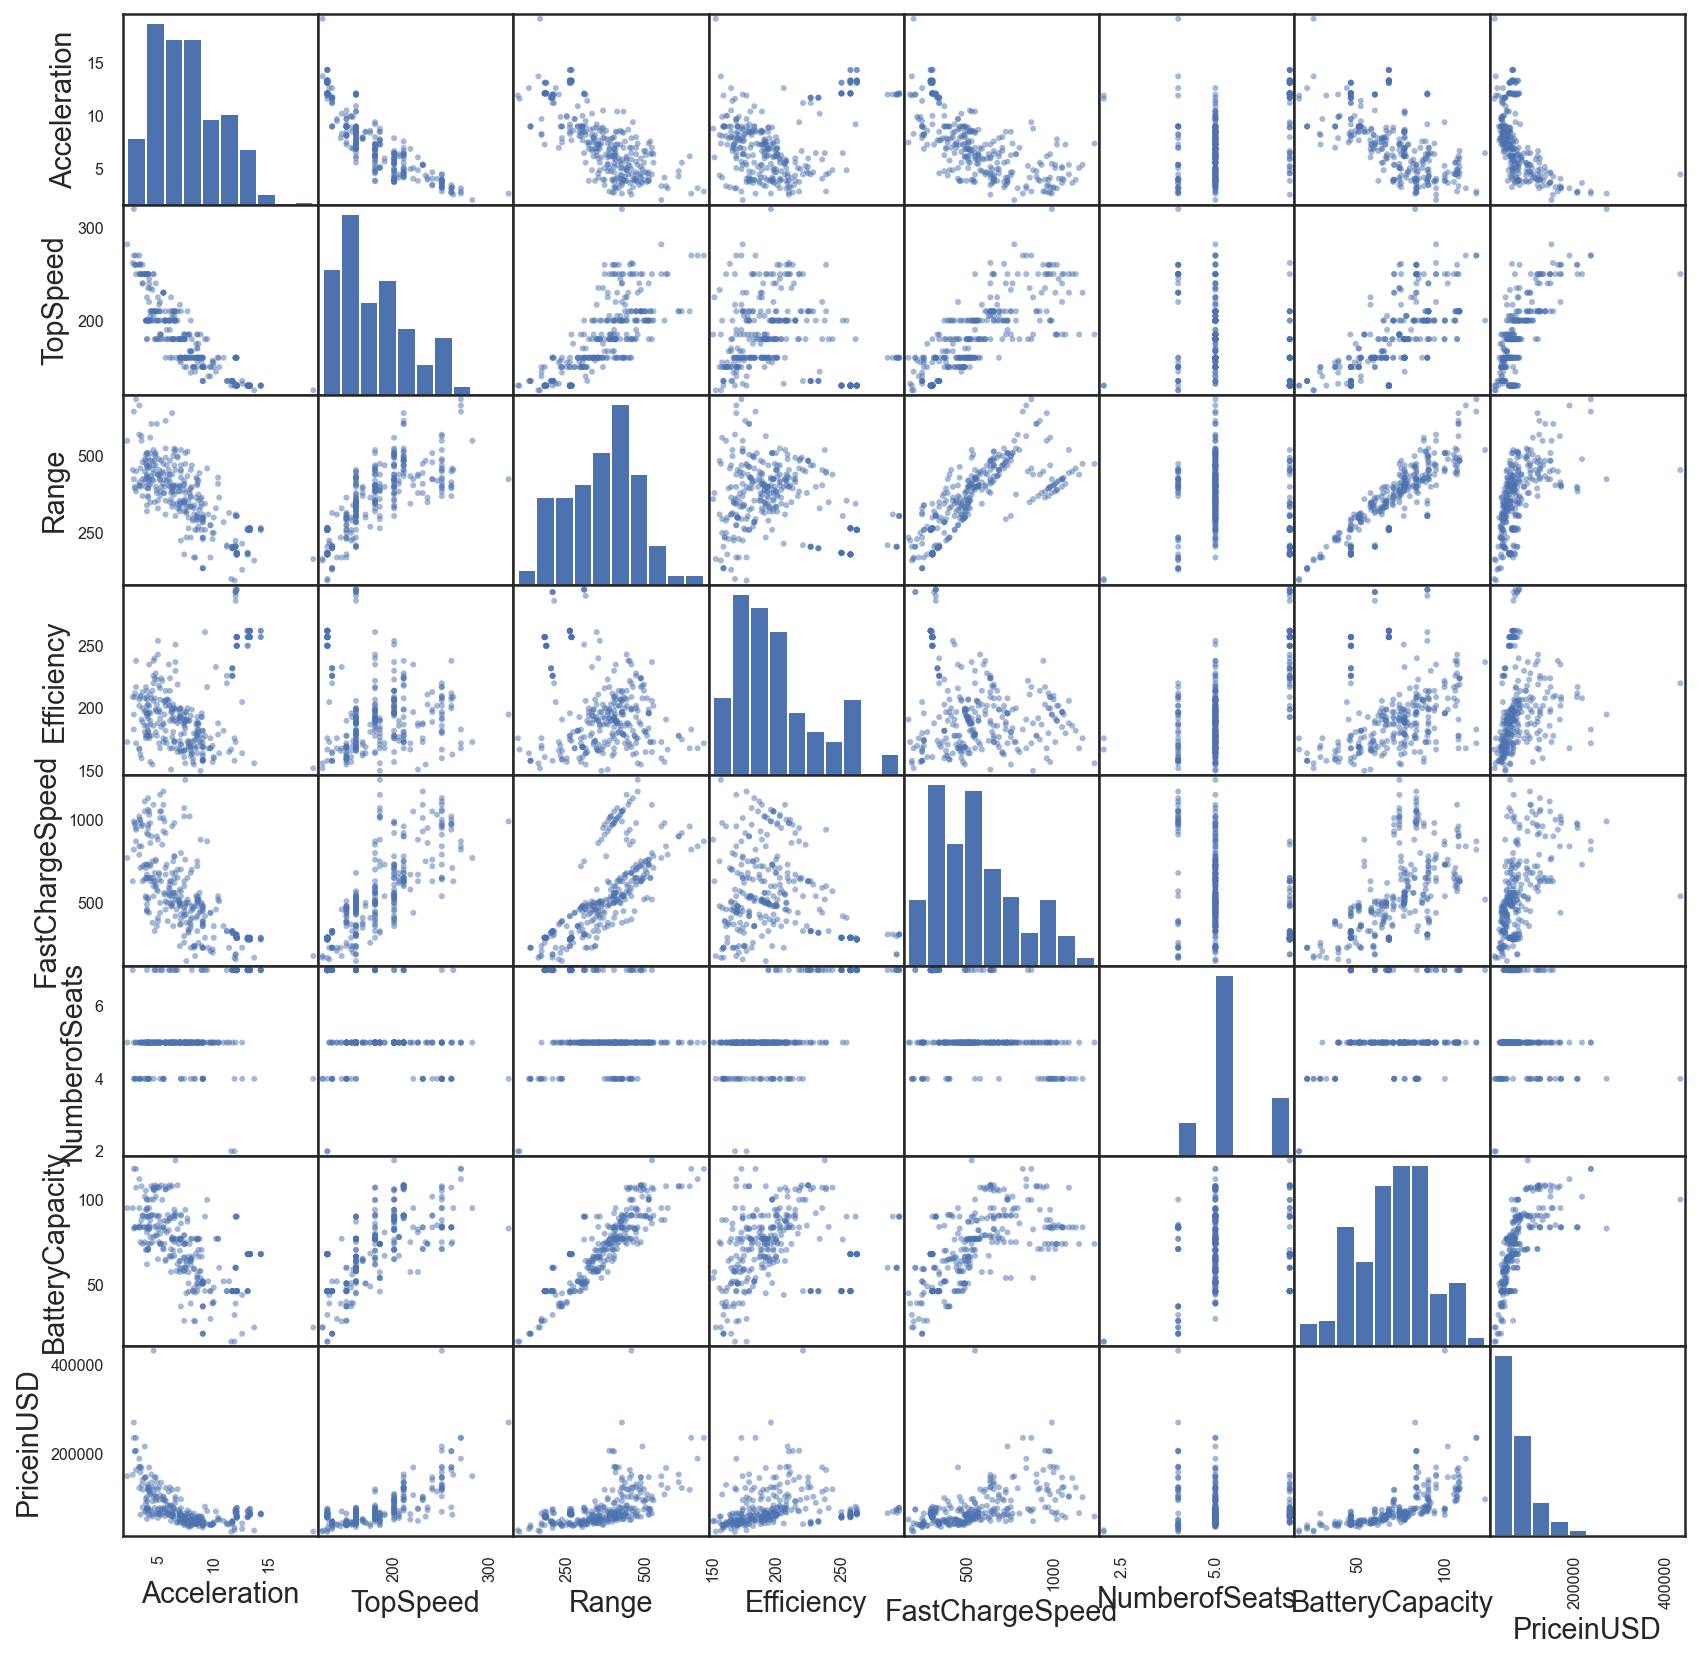

In [41]:
fig = pd.plotting.scatter_matrix(cheapEVs[
    ['Acceleration','TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'NumberofSeats', 'BatteryCapacity','PriceinUSD']],
                                                                                                             figsize=(14,14))

An important factor which has a massive influence on other factors is the price of an EV.

Let us take a deeper dive into that variable, in the standardlized version, `PriceinUSD`.

In [42]:
cheapEVs['PriceinUSD'].describe()

count       291.000000
mean      76500.118488
std       44855.450239
min       23695.200000
25%       50524.875000
50%       63428.400000
75%       83079.000000
max      432000.000000
Name: PriceinUSD, dtype: float64

Out of our 309 observations, 291 of them have a recorded price in our dataset. Average cost being about $76,500.

Now let us take a deeper dive into some of more interesting variables related to price.

Let us see how price affects the acceleration of an EV:

<AxesSubplot:xlabel='PriceinUSD', ylabel='Acceleration'>

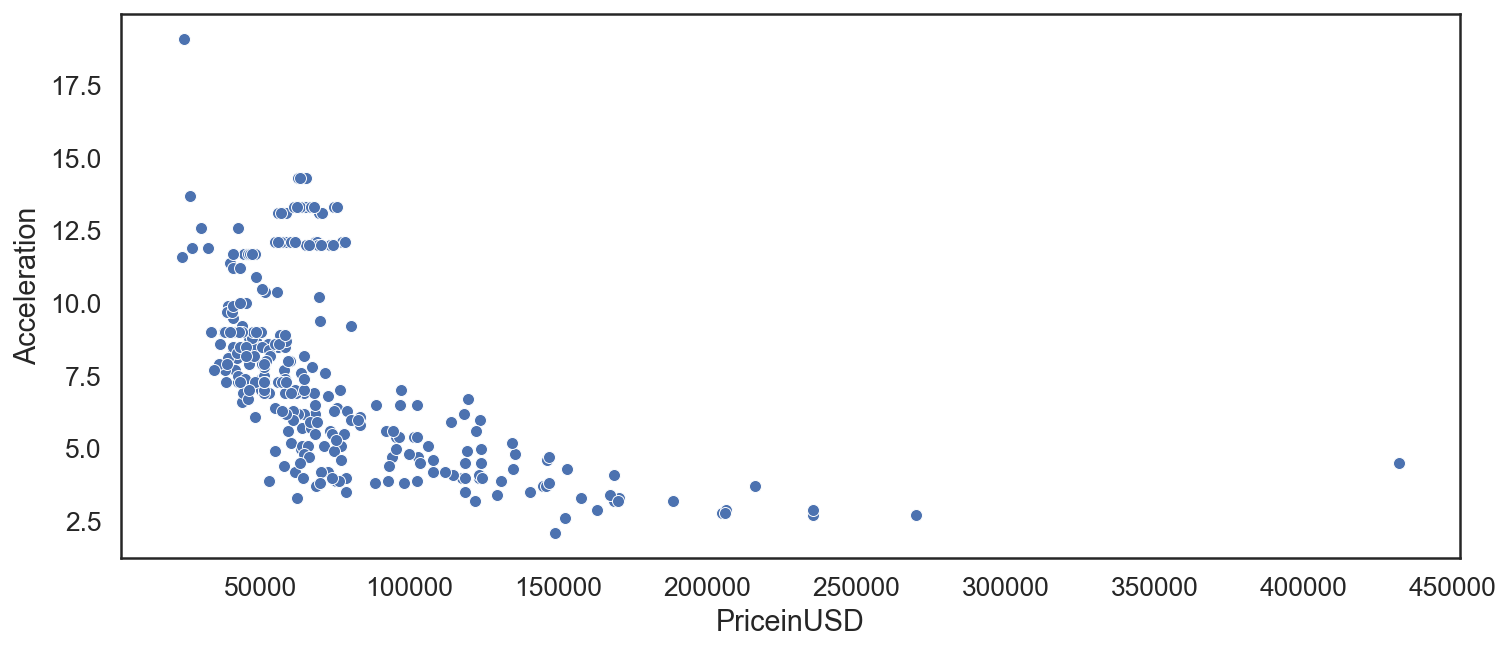

In [43]:
sns.scatterplot(data=cheapEVs, x='PriceinUSD', y='Acceleration')

It seems to be almost a logarithmic relation between the two variables.

Let us see the two outliers for this data:

In [44]:
# First, the top left data point with a high acceleration value
cheapEVs[cheapEVs.Acceleration == cheapEVs.Acceleration.max()]

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceinUSD,BatteryCapacity,Available,Release
188,Dacia Spring Electric 45,19.1,125,165,152,180.0,Front Wheel Drive,4,22550.0,NaN,24354.0,25.0,True,july 2022


In [45]:
# Second, the bottom right data point with a high price
cheapEVs[cheapEVs.PriceinUSD == cheapEVs.PriceinUSD.max()]

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceinUSD,BatteryCapacity,Available,Release
233,Rolls-Royce Spectre,4.5,250,455,220,540.0,All Wheel Drive,4,400000.0,350000.0,432000.0,100.0,False,november 2023


Now let us look at the data with these two outliers removed:

<AxesSubplot:xlabel='PriceinUSD', ylabel='Acceleration'>

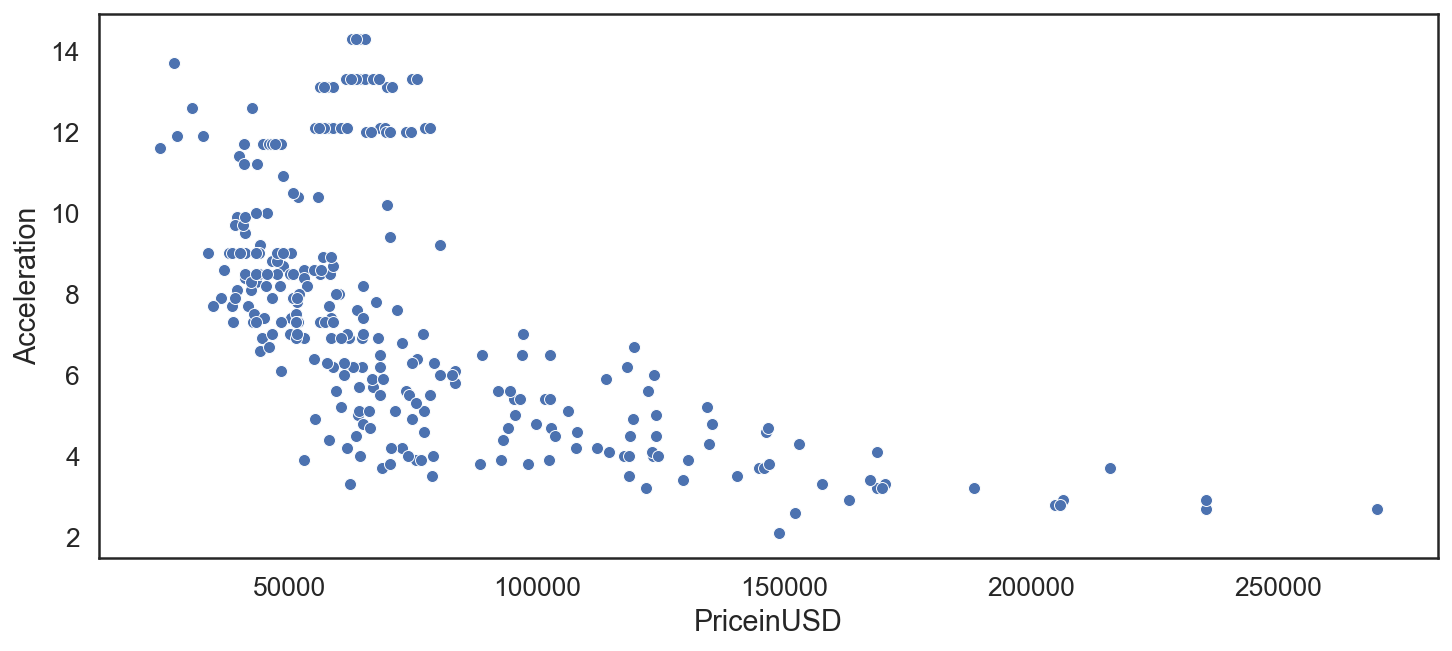

In [46]:
sns.scatterplot(data=cheapEVs[(cheapEVs.PriceinUSD < cheapEVs.PriceinUSD.max()) & (cheapEVs.Acceleration < cheapEVs.Acceleration.max())], 
                                                                                                        x='PriceinUSD', y='Acceleration')

It seems price has a negative correlation with acceleration which makes sense since more expensive cars have a faster acceleration time. However, there seems to be some clustering around 12.5 to 15.0 sec acceleration and 50,000-75,000 USD. 

Let us take a closer dive into this clustering:

In [47]:
clusterEVs = cheapEVs[(cheapEVs.PriceinUSD < 100000.0) & (cheapEVs.PriceinUSD > 50000.0)
                     & (cheapEVs.Acceleration < 15.0) & (cheapEVs.Acceleration > 11.5)]
clusterEVs

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceinUSD,BatteryCapacity,Available,Release
14,Mercedes EQV 300 Long,12.1,160,305,295,310.0,Front Wheel Drive,7,71626.0,83530.0,77356.08,90.0,True,september 2020
30,Mercedes EQV 300 Extra-Long,12.1,160,305,295,310.0,Front Wheel Drive,7,72519.0,NaN,78320.52,90.0,True,october 2020
37,Citroen e-SpaceTourer M 50 kWh,12.1,130,185,250,290.0,Front Wheel Drive,7,53640.0,47495.0,57931.20,46.3,True,november 2020
38,Citroen e-SpaceTourer XL 50 kWh,12.1,130,180,257,290.0,Front Wheel Drive,7,54430.0,48335.0,58784.40,46.3,True,november 2020
39,Citroen e-SpaceTourer M 75 kWh,13.3,130,265,257,290.0,Front Wheel Drive,7,59640.0,NaN,64411.20,68.0,True,february 2021
40,Citroen e-SpaceTourer XL 75 kWh,13.3,130,260,262,280.0,Front Wheel Drive,7,60430.0,NaN,65264.40,68.0,True,february 2021
41,Opel Zafira-e Life M 50 kWh,12.1,130,185,250,290.0,Front Wheel Drive,7,63250.0,50630.0,68310.00,46.3,True,november 2020
42,Opel Zafira-e Life L 50 kWh,12.1,130,180,257,290.0,Front Wheel Drive,7,64075.0,50990.0,69201.00,46.3,True,november 2020
43,Opel Zafira-e Life M 75 kWh,13.3,130,265,257,290.0,Front Wheel Drive,7,69250.0,NaN,74790.00,68.0,True,february 2021
44,Opel Zafira-e Life L 75 kWh,13.3,130,260,262,280.0,Front Wheel Drive,7,70075.0,NaN,75681.00,68.0,True,february 2021


The clustering seems to be caused by different configurations of the same car models. With each model, it seems the different configurations vary in price but seem to mostly have the same acceleration across a model. This may not affect the data too much here but is important to keep in mind during analysis where we might opt to only include one configuration across different models.

Now let us look at the distribution of the `PriceinUSD` variable:

<AxesSubplot:xlabel='PriceinUSD', ylabel='Count'>

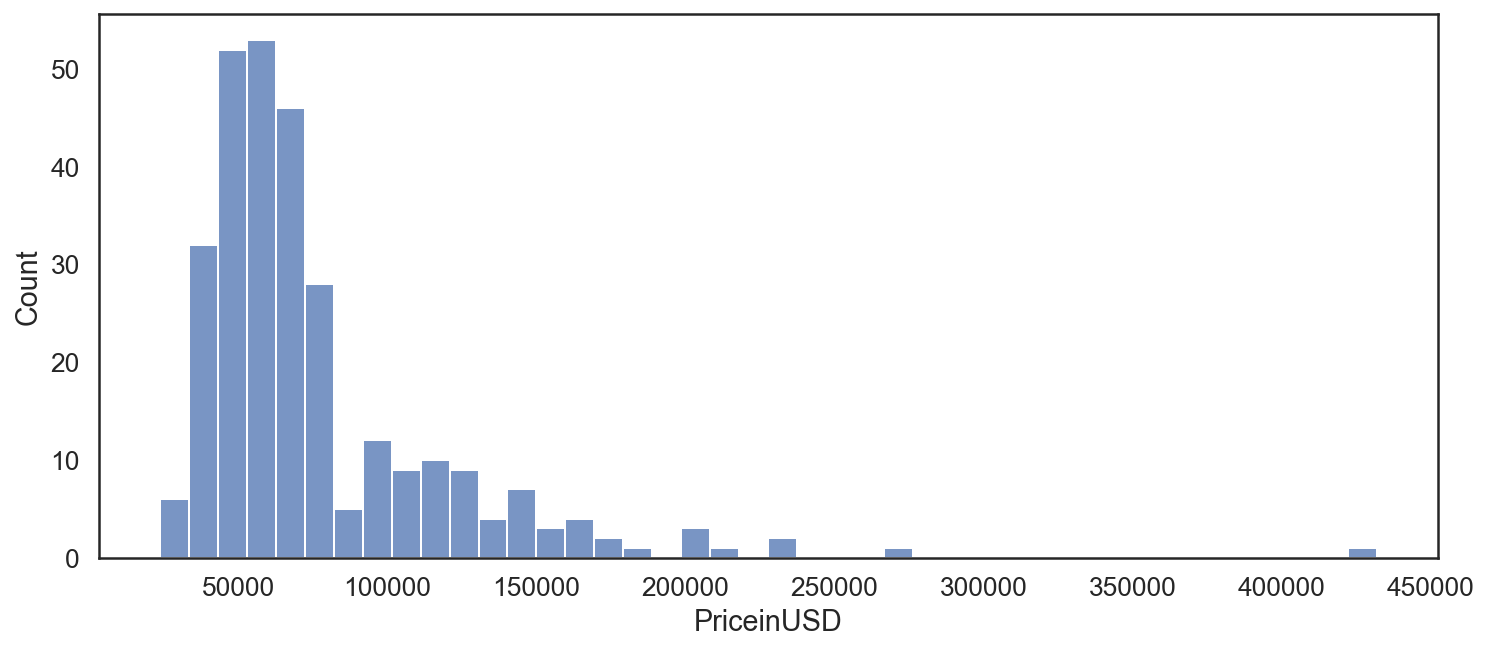

In [48]:
sns.histplot(data=cheapEVs, x='PriceinUSD')

The **Rolls-Royce Spectre**, as we saw earlier, seems to skew the price data a lot at a price of 432,000 USD. (Ironic that the dataset is called cheapEVs.) However, there also seem to be quite a few high-priced EVs that skew the data over all. 

Let us try looking at only the EVs less than 180,000 USD:

In [49]:
cheaperEVs = cheapEVs[cheapEVs.PriceinUSD < 180000]

Now let us take another look at the full data scatter plot with the outliers removed:

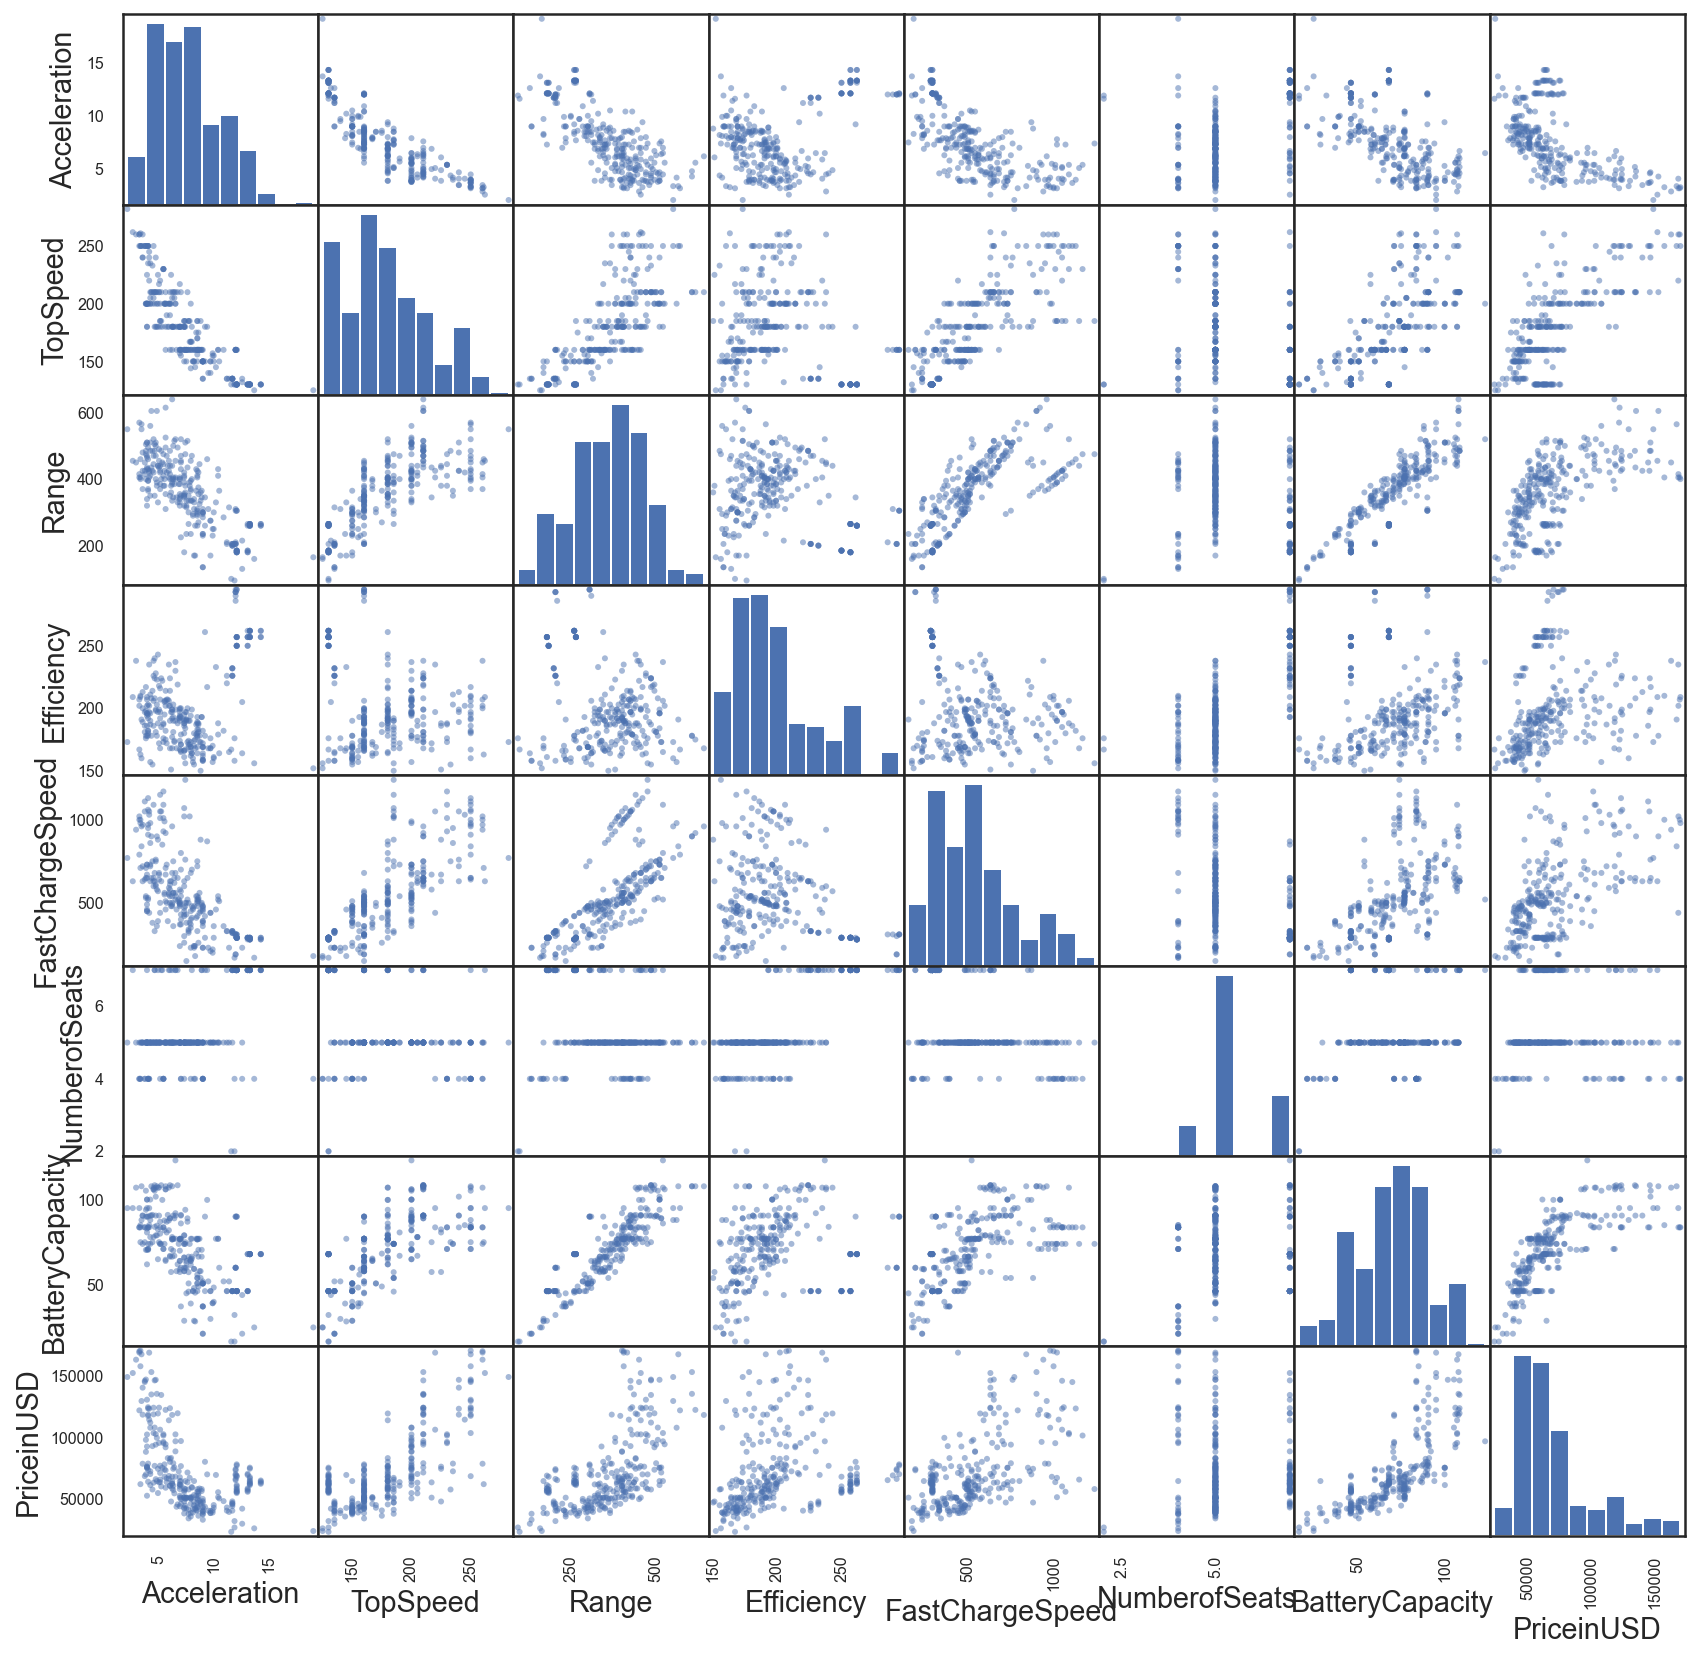

In [50]:
fig = pd.plotting.scatter_matrix(cheaperEVs[
    ['Acceleration','TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'NumberofSeats', 'BatteryCapacity','PriceinUSD']],
                                                                                                             figsize=(14,14))

For the scatter plots with `PriceinUSD` in them, it seems the plots have more spread and variability then what we saw earlier with the outliers

Let us also see how removing the outliers affected the centrality and variability of `PriceinUSD`:

In [51]:
cheaperEVs.PriceinUSD.describe()

count       282.000000
mean      71159.928227
std       31511.296487
min       23695.200000
25%       50206.500000
50%       62553.600000
75%       78315.390000
max      170398.080000
Name: PriceinUSD, dtype: float64

Now let us look at another interesting correlation, `Range` and `FastChargeSpeed`:

<AxesSubplot:xlabel='Range', ylabel='FastChargeSpeed'>

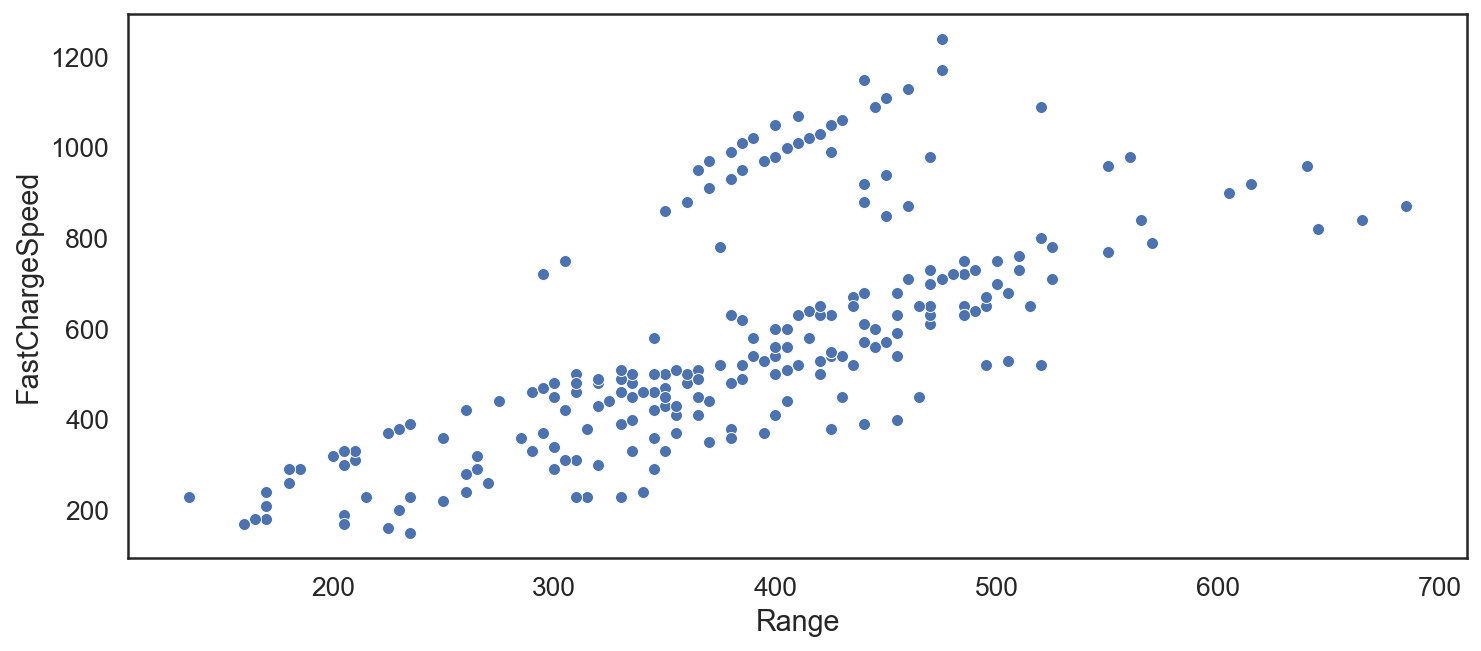

In [52]:
sns.scatterplot(data=cheapEVs, x='Range', y='FastChargeSpeed')

Interesting. There almost seems to be two linear relations between the two variables here. We explore this further in the next three plots. 

/var/folders/t8/3h2_l6g11cj0mcsfxx1hwc840000gn/T/ipykernel_14510/1247517323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range_relationship['CompanyName'] = range_relationship['Name'].str.split().str[0]


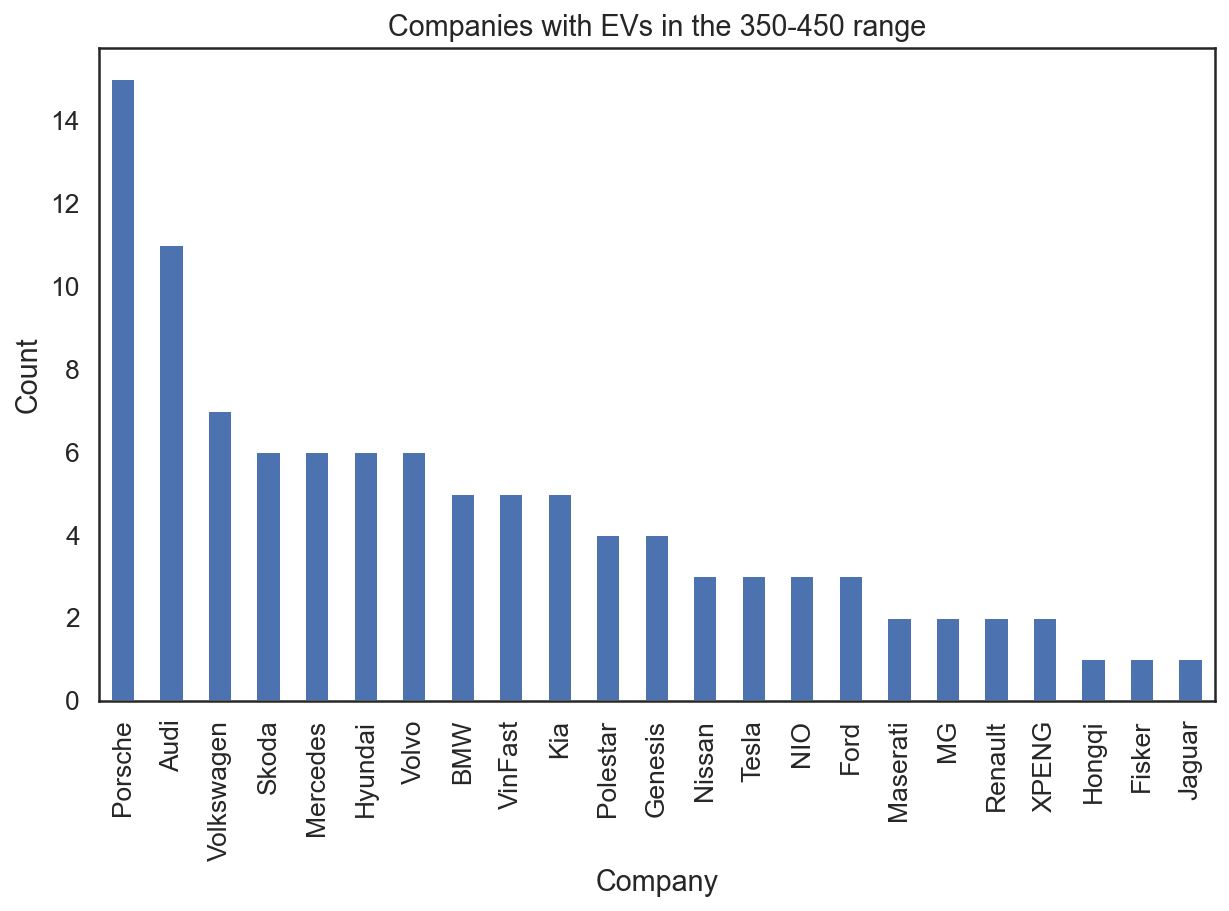

In [53]:
range_relationship = cheapEVs[(cheapEVs['Range'] > 350) & (cheapEVs['Range'] < 450)]
range_relationship['CompanyName'] = range_relationship['Name'].str.split().str[0]
company_counts = range_relationship['CompanyName'].value_counts()
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Companies with EVs in the 350-450 range')
plt.show()

/var/folders/t8/3h2_l6g11cj0mcsfxx1hwc840000gn/T/ipykernel_14510/2429582148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_relationship['CompanyName'] = lower_relationship['Name'].str.split().str[0]


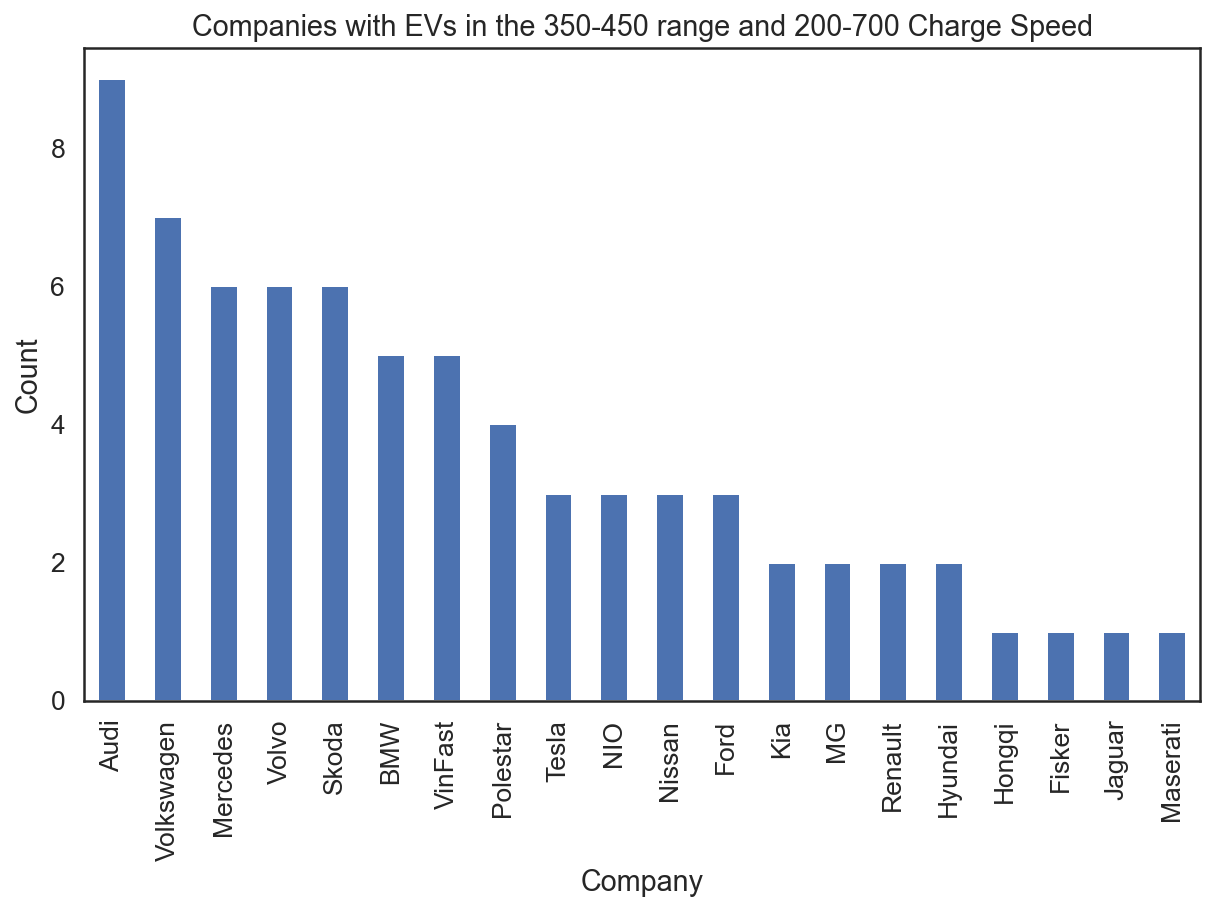

In [54]:
lower_relationship = cheapEVs[(cheapEVs['Range'] > 350) & (cheapEVs['Range'] < 450) & (cheapEVs['FastChargeSpeed'] > 200) & (cheapEVs['FastChargeSpeed'] < 700)]
lower_relationship['CompanyName'] = lower_relationship['Name'].str.split().str[0]
company_counts = lower_relationship['CompanyName'].value_counts()
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Companies with EVs in the 350-450 range and 200-700 Charge Speed')
plt.show()

/var/folders/t8/3h2_l6g11cj0mcsfxx1hwc840000gn/T/ipykernel_14510/3086179188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upper_relationship['CompanyName'] = upper_relationship['Name'].str.split().str[0]


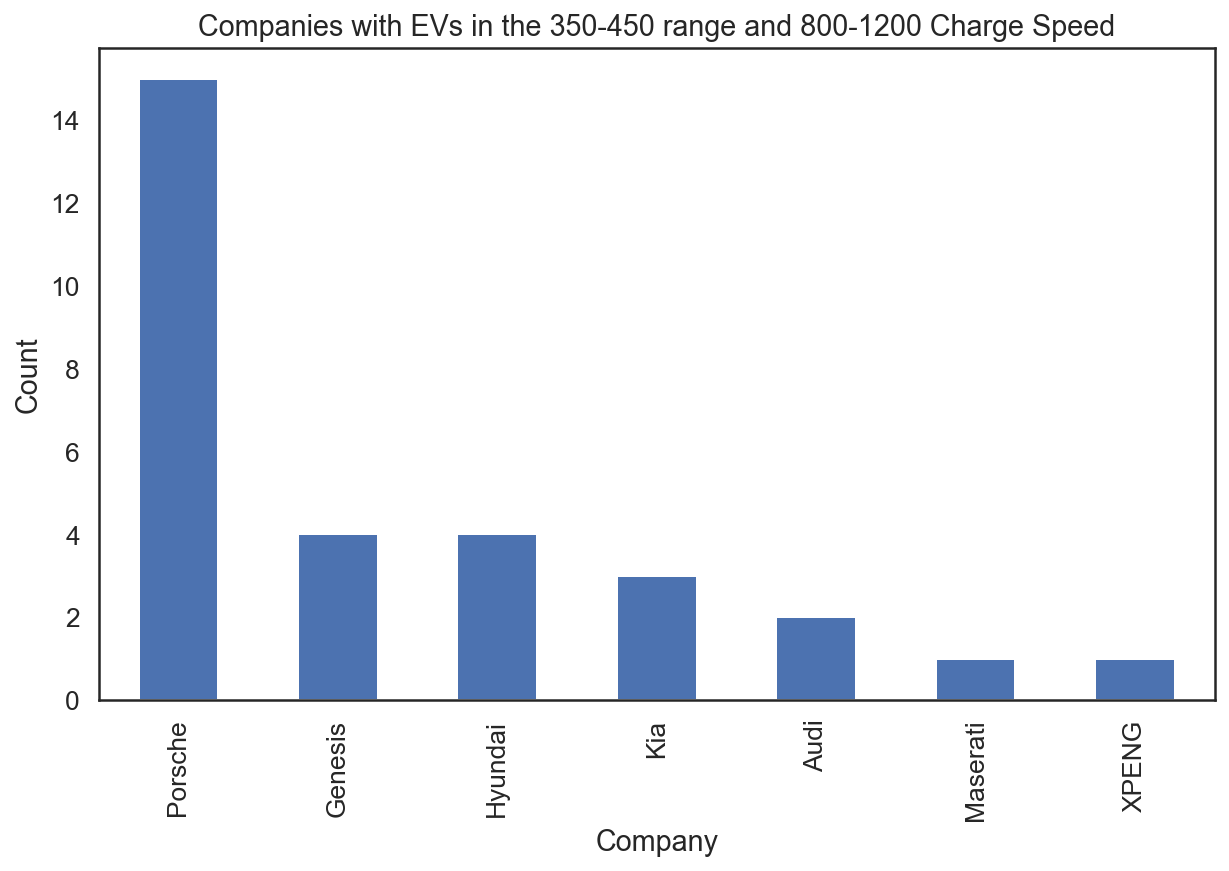

In [55]:
upper_relationship = cheapEVs[(cheapEVs['Range'] > 350) & (cheapEVs['Range'] < 450) & (cheapEVs['FastChargeSpeed'] > 800) & (cheapEVs['FastChargeSpeed'] < 1200)]
upper_relationship['CompanyName'] = upper_relationship['Name'].str.split().str[0]
company_counts = upper_relationship['CompanyName'].value_counts()
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Companies with EVs in the 350-450 range and 800-1200 Charge Speed')
plt.show()

We saw from the scatterplot above that there seemed to be two relationships between Range and Fast Charging Speed (FCS), mostly present between the 350-450 Range values. While the general relationship is positive, indicating that the higher the Range, the higher the FCS, there was also another relationship, which looked like some FCS were noticeably greater than others and followed their own positive trend in between the 350-450 Range values. Thus, we decided to explore this further looking at the value counts of the companies that had cars in those specific ranges. While the companies with higher FCS in the 350-450 Range don't seem to have much in common, most of the cars Porcsche's, which leads us to believe that maybe their premium prices allow them to have the ability to have a much higher FCS than their competitors with those Range values (a guess could be better technology, lower costs, etc).

### EDA on the `teslaStock` dataset

In [56]:
# Tesla Stock Data

# Size and Central Tendency
print(teslaStock.shape)
# We have 3077 observations and 8 variables
teslaStock.describe()

(3077, 8)


,Open,High,Low,Close,Adj Close,Volume,AvgHighLow
count,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3.077000e+03,3077.000000
mean,55.502174,56.748047,54.161176,55.495537,55.495537,9.340392e+07,55.454611
std,93.913081,96.085026,91.517219,93.851345,93.851345,8.235816e+07,93.791921
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,1.053667
25%,8.192667,8.354667,7.970667,8.113333,8.113333,4.144350e+07,8.168000
50%,15.983333,16.242001,15.687333,16.000668,16.000668,7.541550e+07,15.953667
75%,23.586666,23.916668,23.229334,23.523333,23.523333,1.173030e+08,23.609334
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,410.081665


Here we look at the size and central tendency of the Tesla Stock data, we have 3077 observations and 8 variables, in the following cell we also see the date range of the data. 

In [57]:
# Date range
teslaStock['Date'].min(), teslaStock['Date'].max()

(Timestamp('2010-06-30 00:00:00'), Timestamp('2022-09-19 00:00:00'))

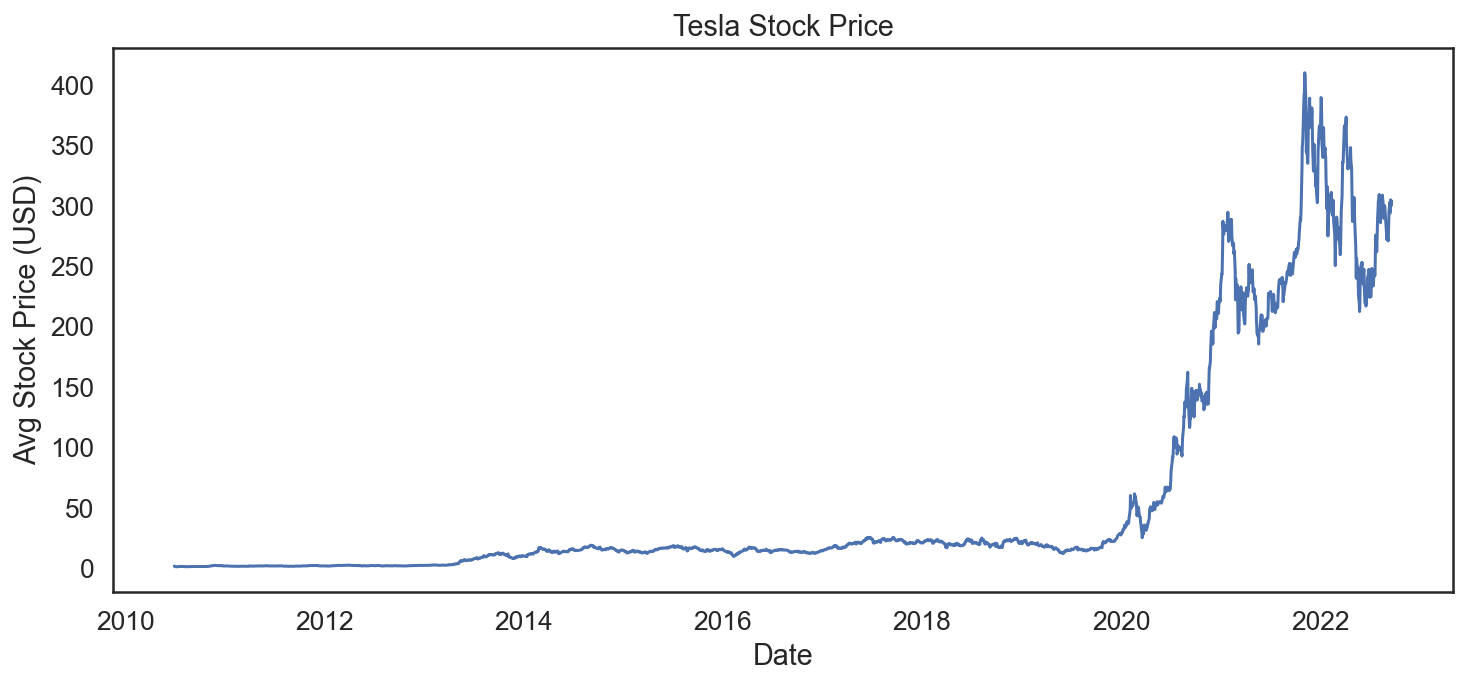

In [58]:
plt.plot(teslaStock['Date'], teslaStock['AvgHighLow'])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Avg Stock Price (USD)')
plt.title('Tesla Stock Price')

plt.show()

Here, we look at the stock price for Tesla from the data available, we are plotting the average stock price of each day using the average of high and low price. There seems to be a sudden large increase in the stock price and stock variablity after 2020. From research, this is when Tesla was added to the S&P500, an incredibly popular stock index, which boosted the price and popularity of the Tesla share. 

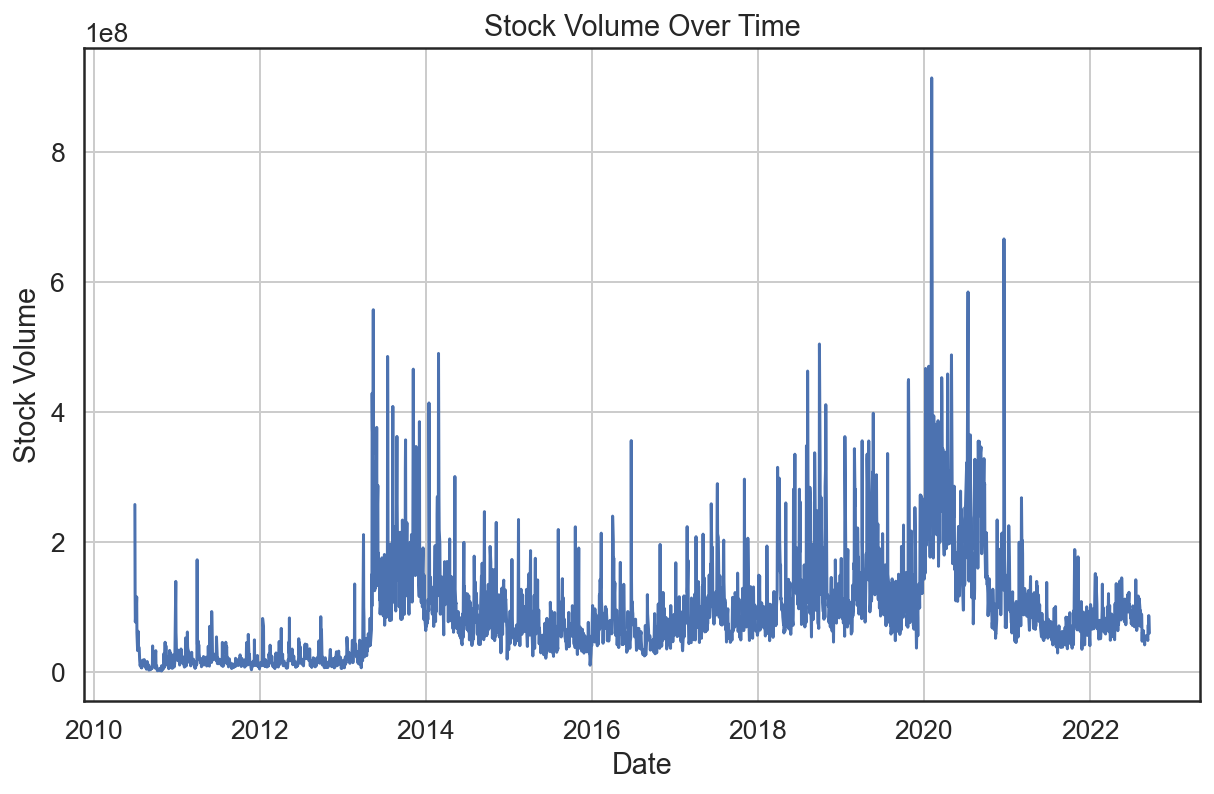

In [59]:
# Stock Volume Over Time
plt.figure(figsize=(10, 6))
plt.plot(teslaStock['Date'], teslaStock['Volume'])
plt.xlabel('Date')
plt.ylabel('Stock Volume')
plt.title('Stock Volume Over Time')
plt.grid(True)
plt.show()

Here, we look at the stock volume being traded for every day, there seem to be large peaks in 2020, possibly due to the S&P 500 addition. Let's look at the stock data after 2020 and try to find some points of interest.  

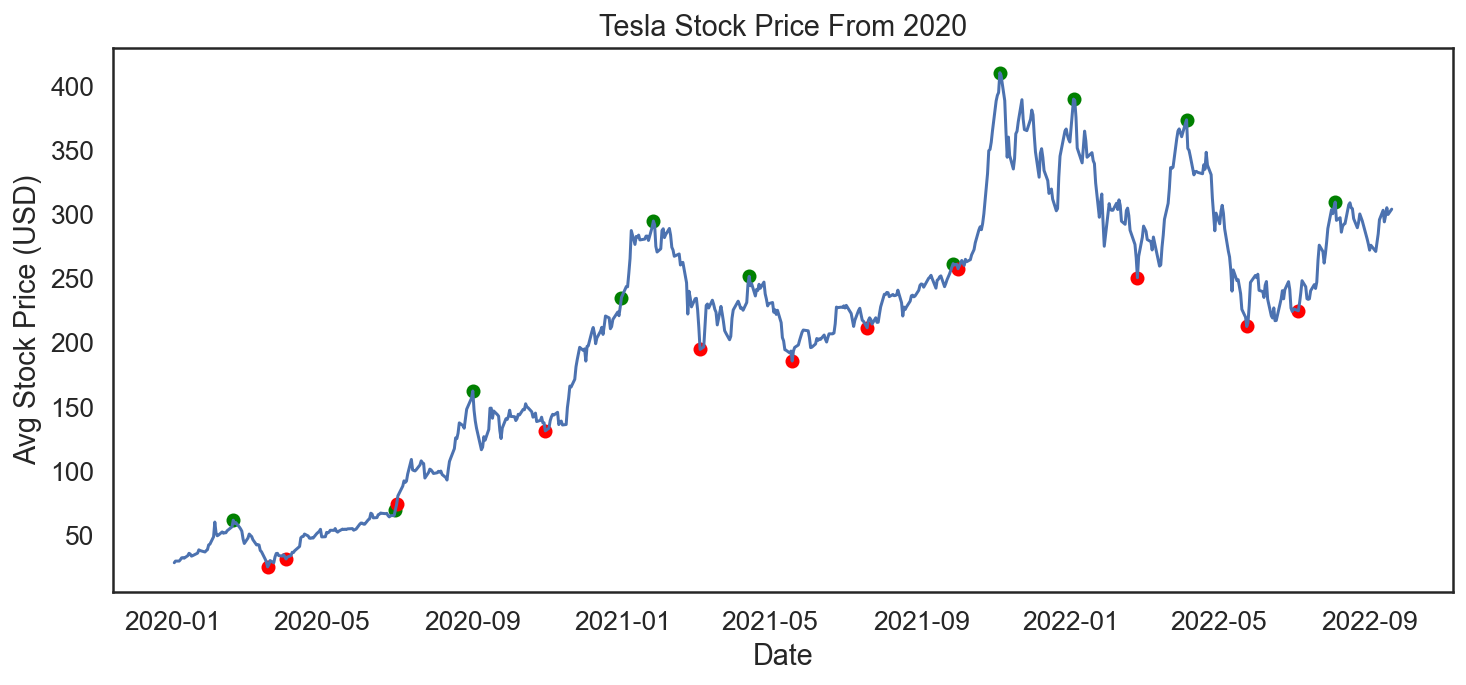

In [60]:
#we see a lot of variability in the graph after 2020, here we try to find some peaks and dips (just interesting points in general)
#variability due to Tesla being added S&P 500 
teslaStockPost2020 = teslaStock[teslaStock['Date'] >= '2020-01-01']
plt.plot(teslaStockPost2020['Date'], teslaStockPost2020['AvgHighLow'])

teslaStockPost2020.set_index("Date", inplace=True)

#get max and min stock values for every quarter 
teslaMaxPost2020idx = teslaStockPost2020.resample('Q')['AvgHighLow'].idxmax()
teslaMinPost2020idx = teslaStockPost2020.resample('Q')['AvgHighLow'].idxmin()

teslaMaxPost2020 = teslaStockPost2020.loc[teslaMaxPost2020idx]
teslaMinPost2020 = teslaStockPost2020.loc[teslaMinPost2020idx]


plt.scatter(teslaMaxPost2020.index, teslaMaxPost2020['AvgHighLow'], color="green")
plt.scatter(teslaMinPost2020.index, teslaMinPost2020['AvgHighLow'], color="red")

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Avg Stock Price (USD)')
plt.title('Tesla Stock Price From 2020')

plt.show()

Using the stock data after 2020, we found the minima and maxima every quarter and plotted them in the above graph. The maxima are in green, and the minima in red. We will use these later as points of interest and see if they intersect with any strategic moves on Tesla's part in their EV lineup. 

# Ethics & Privacy

Instructions (delete later): *Fill in your ethics & privacy discussion here*

As far as we know, our data does not have any major issues in the case of privacy, as the information that we are dealing with is all public and actively distributed by the car companies themselves, with the exception of private companies who may not reveal as much internal information as public ones which could either lead to missing or estimated data. Some of the data we are looking at, such as the [EVDB](https://ev-database.org/), is a public database on EVs. It was collected completely independently without any outside funding (funded only through ads) for the sake of making EV information more accessible. The information is put up based on outlined criteria, which they disclose, and they actively try to get the most accurate information by inviting people to enter any discrepancies they may see with the data. In that regard, the data we have analyzed has been ethically obtained. One limitation of our data, however, is that some sources only consider EVs available in certain markets, such as the [EVDB](https://ev-database.org/), as it only has information of EVs in the Netherlands, the United Kingdom, and Germany, thus excluding all other EV markets. Moreover, the observations in our data have no personally identifiable information, as we are analyzing EV companies and not people. 

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*